In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [5]:
x_train = pd.read_csv('../data/processed/train.csv', index_col=False)
x_test = pd.read_csv('../data/processed/test.csv', index_col=False)

In [6]:
y_train = x_train.pop('label')
y_test = x_test.pop('label')

In [7]:
x_train.head()

,state_others,ct_state_ttl,service_ftp-data,service_dns,dinpkt,sloss,swin,dload,smean,ct_srv_src,...,state_REQ,proto_tcp,sbytes,state_INT,tcprtt,service_ftp,sinpkt,spkts,ct_dst_src_ltm,service_ssh
0,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,0.520319,-0.680474,...,0,0,-0.043684,1,-0.482025,0,-0.122179,-0.124455,-0.477994,0
1,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,3.556716,-0.680474,...,0,0,-0.036308,1,-0.482025,0,-0.122180,-0.124455,-0.477994,0
2,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,1.892214,-0.590304,...,0,0,-0.040351,1,-0.482025,0,-0.122180,-0.124455,-0.390391,0
3,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,1.489280,-0.590304,...,0,0,-0.041330,1,-0.482025,0,-0.122180,-0.124455,-0.390391,0
4,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,4.429740,-0.590304,...,0,0,-0.034187,1,-0.482025,0,-0.122179,-0.124455,-0.390391,0


# Modeling

- Logistic Regresion
- eXtream Gradient Boosting
- Random Forest
- Categorical Boosting

- To do:

    - Gradient Descent
    - Voting
    - cv
    - Evaluations
    - Classification Report

## <center>Logistic Regression</center>
<center>Accuracy: 0.92468</center>

In [8]:

# Logistic Regresion with cross-validation

lr = LogisticRegressionCV(random_state=42, cv=5)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test, y_pred_lr)

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

0.924682990817665

## <center>eXtream Gradient Boosting</center>
<center>Accuracy: 0.98848</center>

In [9]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:12:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9884856434922022

## <center>Random Forest</center>
<center>Accuracy: 0.99990</center>

In [10]:

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.9999028324345334

## <center>Categorical Boosting</center>
<center>Accuracy: 0.98781</center>

In [11]:

cat = CatBoostClassifier(random_state=42)
cat.fit(x_train, y_train)
y_pred_cat = cat.predict(x_test)
accuracy_score(y_test, y_pred_cat)

Learning rate set to 0.067746
0:	learn: 0.5619310	total: 164ms	remaining: 2m 43s
1:	learn: 0.4677234	total: 187ms	remaining: 1m 33s
2:	learn: 0.4071310	total: 214ms	remaining: 1m 11s
3:	learn: 0.3594429	total: 237ms	remaining: 59.1s
4:	learn: 0.3200316	total: 260ms	remaining: 51.7s
5:	learn: 0.2911761	total: 284ms	remaining: 47s
6:	learn: 0.2679681	total: 306ms	remaining: 43.4s
7:	learn: 0.2525980	total: 331ms	remaining: 41s
8:	learn: 0.2369015	total: 356ms	remaining: 39.2s
9:	learn: 0.2246790	total: 383ms	remaining: 37.9s
10:	learn: 0.2145965	total: 410ms	remaining: 36.9s
11:	learn: 0.2077005	total: 440ms	remaining: 36.2s
12:	learn: 0.2002730	total: 470ms	remaining: 35.7s
13:	learn: 0.1943680	total: 499ms	remaining: 35.1s
14:	learn: 0.1896635	total: 524ms	remaining: 34.4s
15:	learn: 0.1835661	total: 552ms	remaining: 34s
16:	learn: 0.1786140	total: 582ms	remaining: 33.7s
17:	learn: 0.1735945	total: 610ms	remaining: 33.3s
18:	learn: 0.1682322	total: 636ms	remaining: 32.8s
19:	learn: 0.1

0.9878176164796191

## Feature Importance

In [13]:
# First lets take a look to our features

features = pd.read_csv('../data/raw/NUSW-NB15_features.csv', encoding='cp1252')
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
pd.options.display.max_colwidth = 130

C:\Users\i2u3e\AppData\Local\Temp\ipykernel_23912\4211109572.py:3: DtypeWarning: Columns (2,4,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ids_limpio.csv')


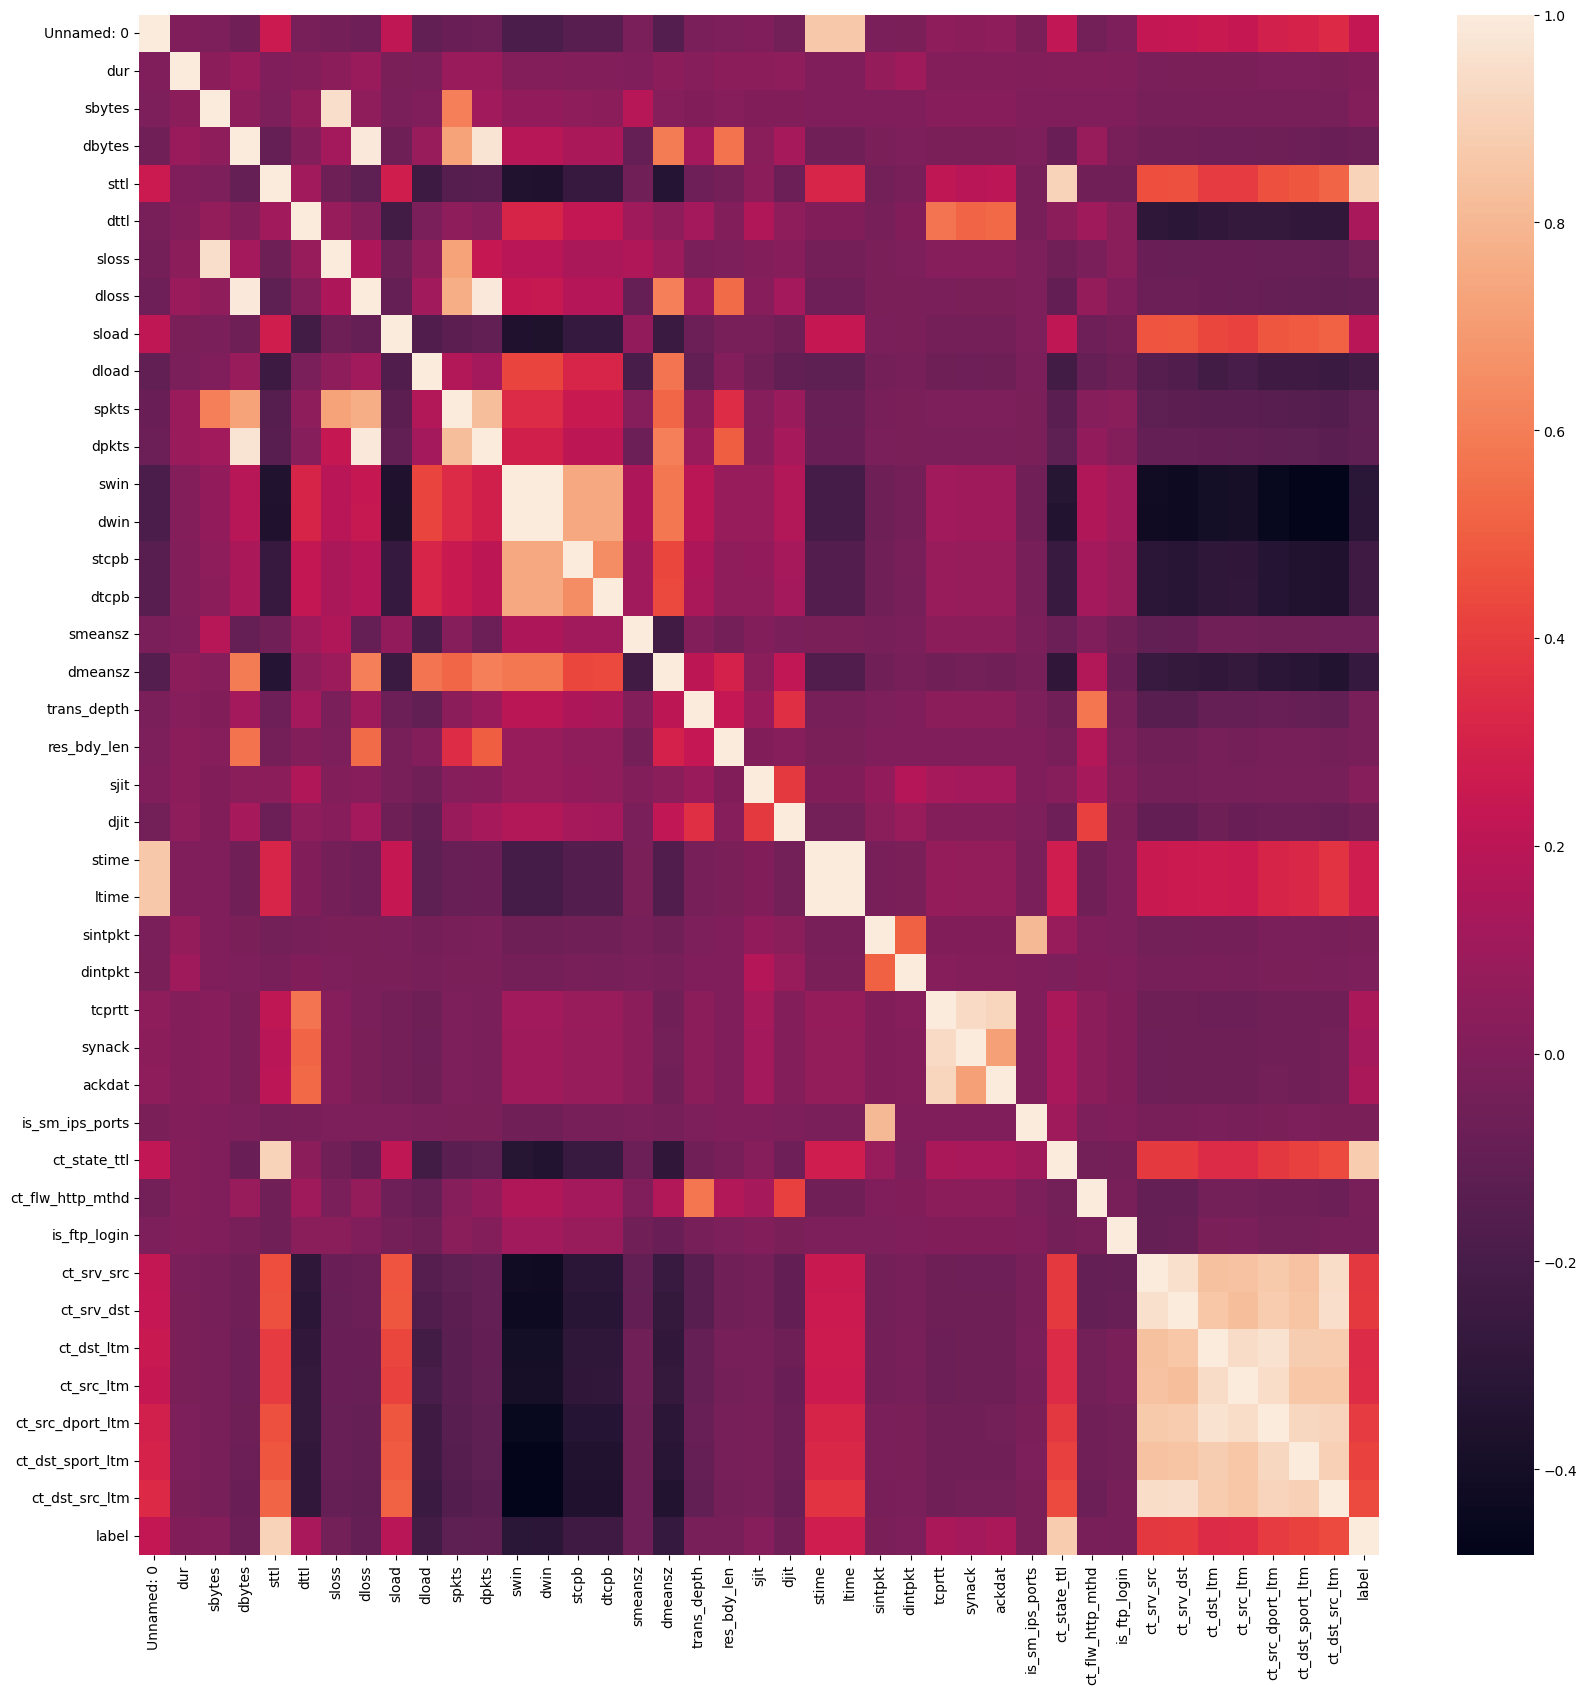

In [15]:
##############################################
######## no ejecutar esta celda  #############
######## datos demasiado pesados #############
##############################################

# correlations

df = pd.read_csv('../data/ids_limpio.csv') 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr());

In [16]:
rf.feature_importances_

array([1.23365628e-06, 6.32761807e-02, 5.06349852e-04, 5.26347207e-03,
       2.58751364e-02, 1.35794097e-02, 5.71918181e-03, 2.72708371e-02,
       5.26317000e-02, 2.54833378e-02, 1.37115418e-03, 1.80466400e-02,
       4.35859407e-03, 2.27238773e-04, 2.46294508e-02, 1.00111061e-03,
       3.12314170e-02, 1.34703107e-02, 1.68173967e-03, 4.70735916e-03,
       3.09522859e-03, 7.78021448e-03, 2.88002836e-06, 2.27868623e-02,
       9.39848517e-03, 3.22149396e-02, 7.75544888e-03, 7.49860454e-03,
       3.98111106e-02, 7.47949951e-05, 2.61707388e-02, 1.93893021e-02,
       2.74579985e-04, 3.21379808e-03, 1.05735780e-02, 4.97107117e-02,
       7.33955535e-03, 3.66056506e-02, 8.08034453e-02, 2.24943048e-05,
       4.68443579e-02, 6.00066502e-03, 7.58027604e-03, 4.65275246e-03,
       5.78886863e-03, 5.01826288e-02, 5.12045945e-02, 2.07725068e-02,
       4.38250973e-04, 1.74170635e-02, 1.00482951e-02, 9.42140054e-02,
       1.45750946e-06])

In [17]:
fi = pd.DataFrame(rf.feature_importances_,
                    x_train.columns,
                    columns= ['Feature Importance']).sort_values('Feature Importance', ascending=False)
fi

,Feature Importance
ct_dst_src_ltm,0.094214
sttl,0.080803
ct_state_ttl,0.063276
smean,0.052632
state_INT,0.051205
sbytes,0.050183
ct_srv_dst,0.049711
rate,0.046844
sload,0.039811
ct_dst_sport_ltm,0.036606


In [18]:
fi.iloc[0:9].sum()

Feature Importance    0.528679
dtype: float64

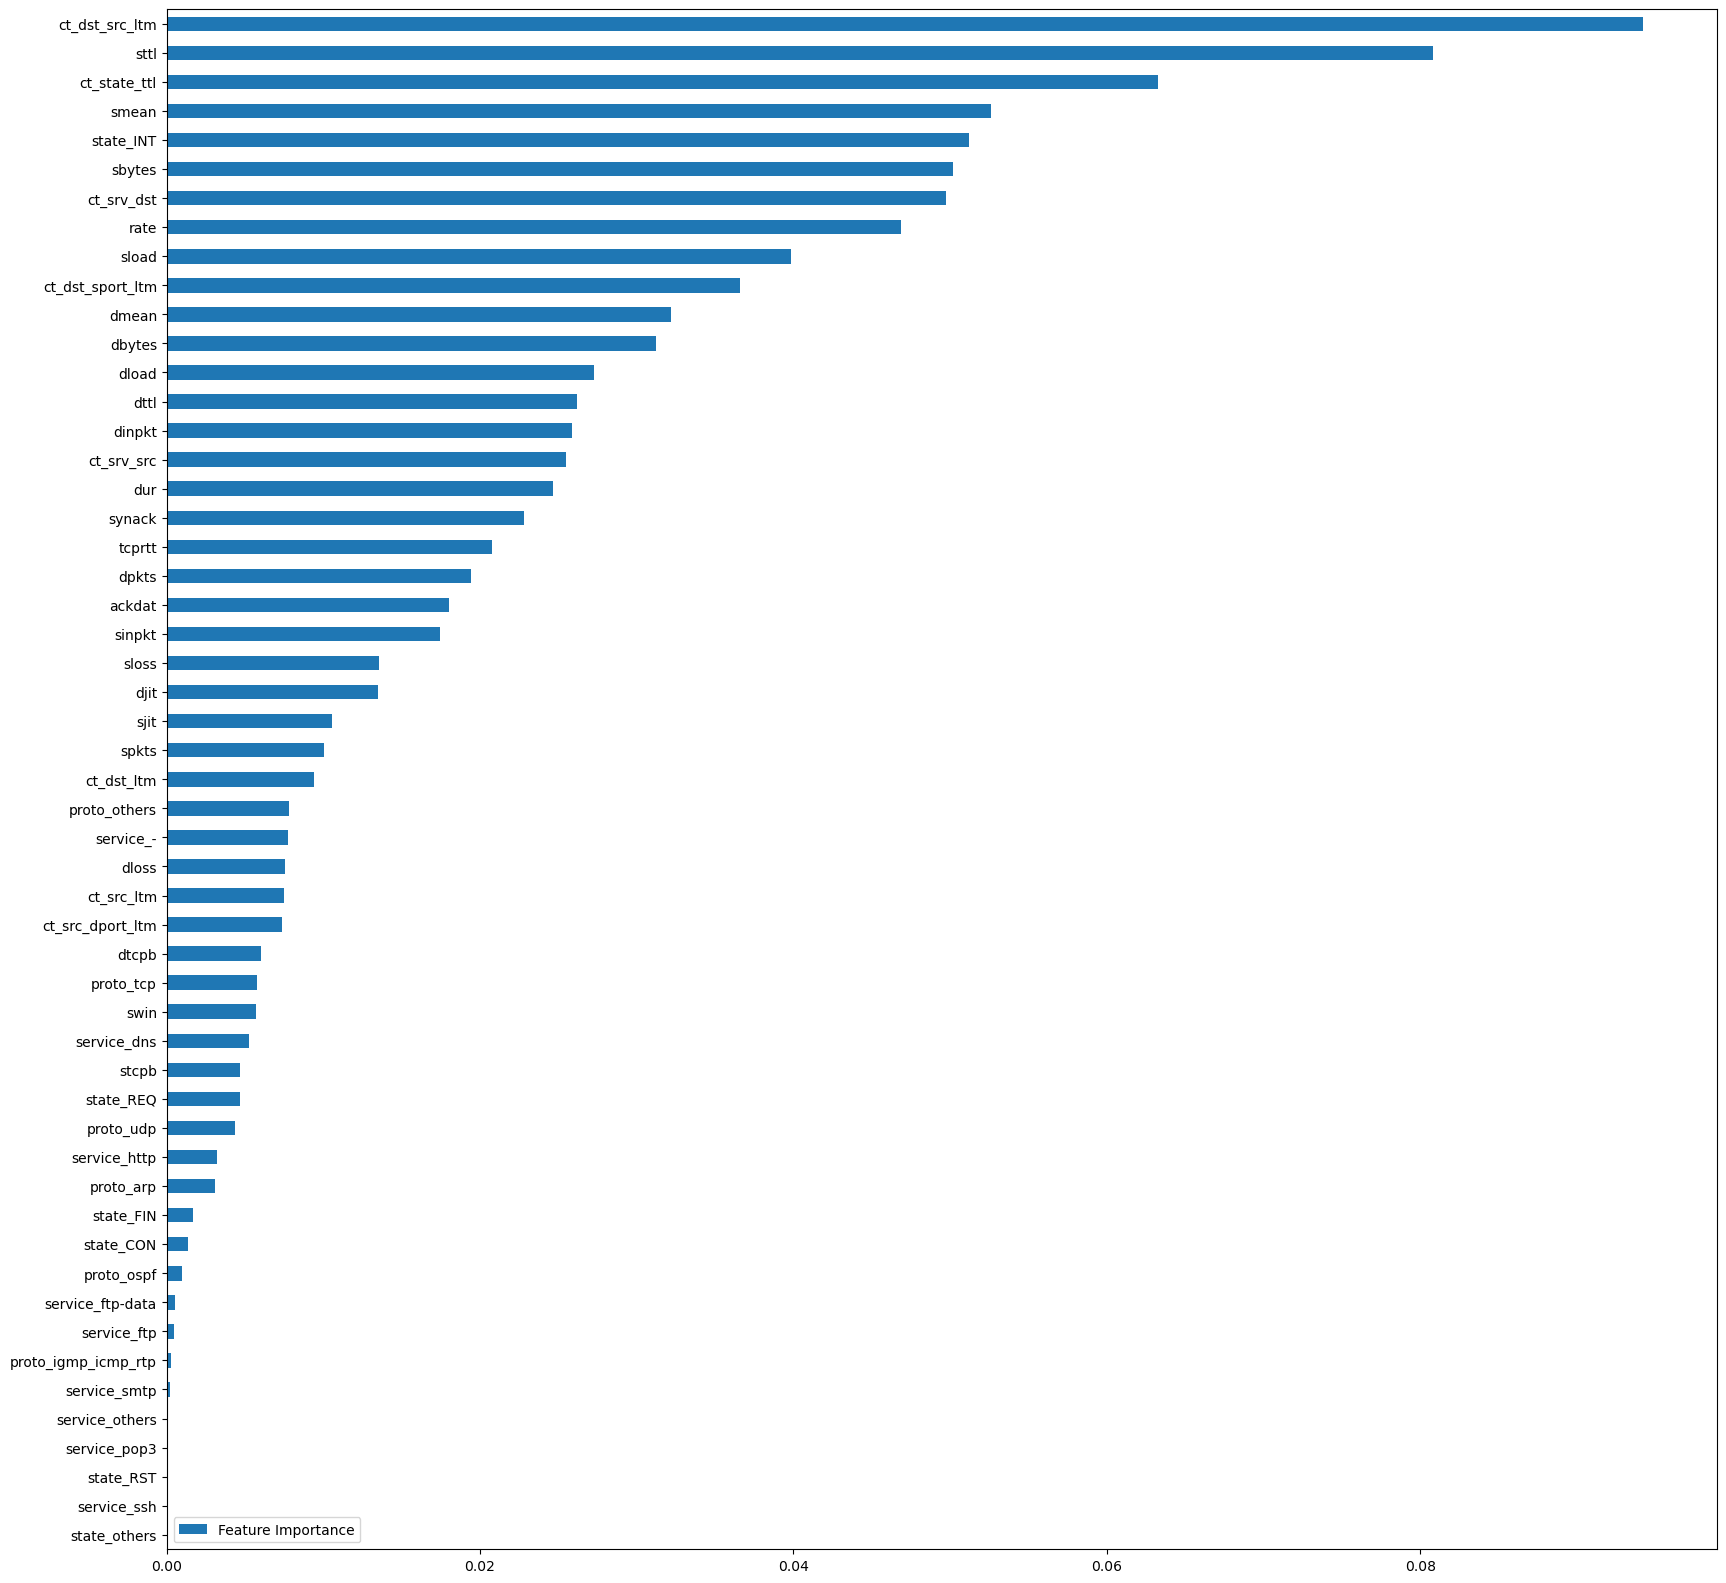

In [19]:
fi.sort_values('Feature Importance').plot.barh(y='Feature Importance', figsize=(20,20));

In [20]:
top_importance = fi.iloc[0:8,].sum() * 100 

cell_importance = f"These features account for {round(top_importance.iloc[0])}% of the total relevance of the data."



In [21]:
cell_importance

'These features account for 49% of the total relevance of the data.'

In [22]:
top_f = ['ct_dst_src_ltm', 'sttl' , 'ct_state_ttl', 'smean', 'state_INT', 'sbytes', 'ct_srv_dst', 'rate', 'TOTAL IMPORTANCE']
top_f2 = [features.iloc[46, 3], features.iloc[9, 3], features.iloc[36, 3], features.iloc[22, 3], features.iloc[5, 3], features.iloc[7, 3], features.iloc[41, 3], 'packed sending speed*', cell_importance]
top = pd.DataFrame(top_f2, top_f, columns=['Most important features'])
top

,Most important features
ct_dst_src_ltm,No of connections of the same source (1) and t...
sttl,Source to destination time to live value
ct_state_ttl,No. for each state (6) according to specific r...
smean,Mean of the ?ow packet size transmitted by the...
state_INT,Indicates to the state and its dependent proto...
sbytes,Source to destination transaction bytes
ct_srv_dst,No. of connections that contain the same servi...
rate,packed sending speed*
TOTAL IMPORTANCE,These features account for 49% of the total re...


# Model Evaluation
- Accuracy
- Confusion matrix
- Classification report

## <center>Accuracy</center>

In [23]:
results = [(accuracy_score(y_test, y_pred_lr)), (accuracy_score(y_test, y_pred_xgb)), (accuracy_score(y_test, y_pred_rf)), (accuracy_score(y_test, y_pred_cat))]
models = ['Logistic Regression', 'XGBoost', 'Random Forest', 'CatBoost']

resultados = pd.Series(results, models).sort_values(ascending=False)
resultados

Random Forest          0.999903
XGBoost                0.988486
CatBoost               0.987818
Logistic Regression    0.924683
dtype: float64

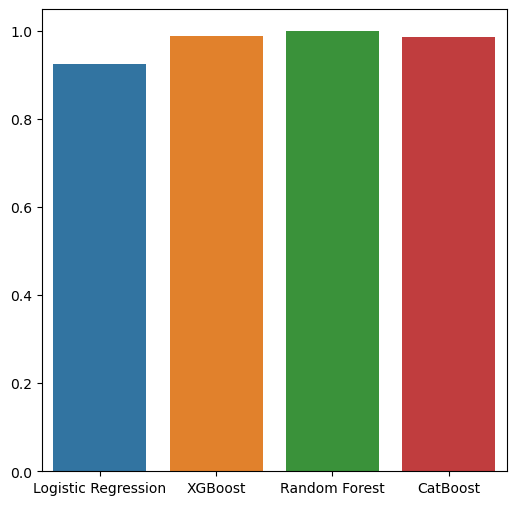

In [24]:
plt.figure(figsize=(6,6))
sns.barplot(x=models, y=results);

## <center>Classification Report & Confusion Matrix  </center>

### <center>Random Forest</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


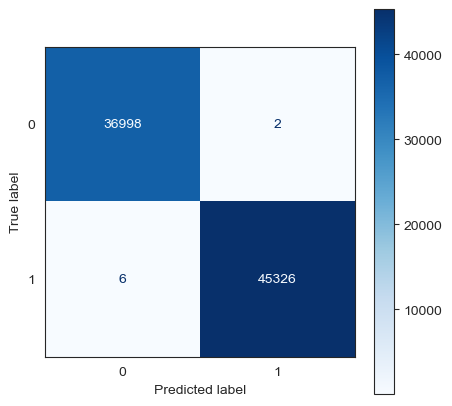

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37000
           1       1.00      1.00      1.00     45332

    accuracy                           1.00     82332
   macro avg       1.00      1.00      1.00     82332
weighted avg       1.00      1.00      1.00     82332



In [25]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_rf))


### <center>XGBoost</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


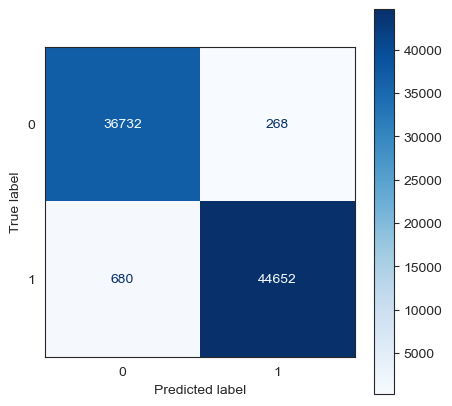

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     37000
           1       0.99      0.98      0.99     45332

    accuracy                           0.99     82332
   macro avg       0.99      0.99      0.99     82332
weighted avg       0.99      0.99      0.99     82332



In [26]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_xgb))

### <center>CatBoost</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


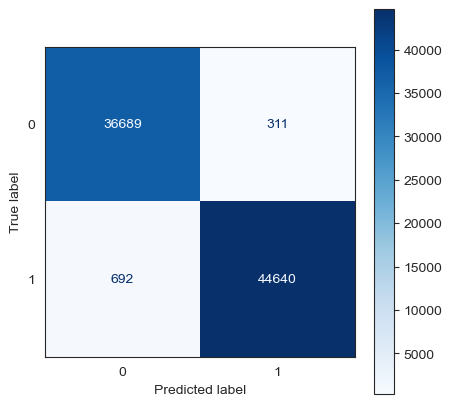

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     37000
           1       0.99      0.98      0.99     45332

    accuracy                           0.99     82332
   macro avg       0.99      0.99      0.99     82332
weighted avg       0.99      0.99      0.99     82332



In [27]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(cat, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_cat))

### <center>Logistic Regression</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


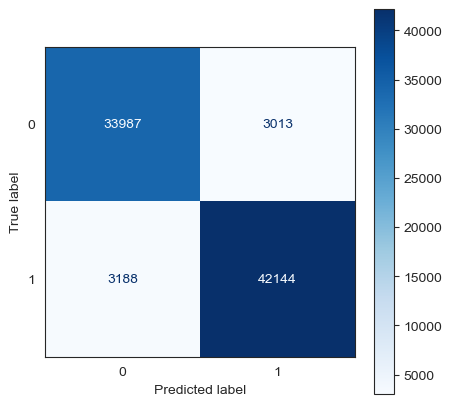

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     37000
           1       0.93      0.93      0.93     45332

    accuracy                           0.92     82332
   macro avg       0.92      0.92      0.92     82332
weighted avg       0.92      0.92      0.92     82332



In [28]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(lr, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_lr))


In [29]:
import pickle

# random forest model
with open('../model/rf_model.pkl','wb') as rf_model:
    pickle.dump(rf,rf_model)


In [30]:
# logistic regression model
with open('../model/lr_model.pkl','wb') as lr_model:
    pickle.dump(lr,lr_model)


In [31]:
# catboost model
with open('../model/cat_model.pkl','wb') as cat_model:
    pickle.dump(cat,cat_model)


In [32]:
# xgb model
with open('../model/xgb_model.pkl','wb') as xgb_model:
    pickle.dump(xgb,xgb_model)


In [ ]:

# load
#with open('model.pkl', 'rb') as f:
#    clf2 = pickle.load(f)

#clf2.predict(X[0:1])